In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_excel('/content/ticketprice.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,18/05/2019,Delhi,Cochin,DEL → COK,11:00,14:15,3h 15m,non-stop,No info,9564
1,Jet Airways,27/06/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,08:10,12:35 28 Jun,28h 25m,2 stops,No info,14300
2,Air India,6/06/2019,Delhi,Cochin,DEL → BOM → COK,13:00,19:15,6h 15m,1 stop,No info,8372
3,Jet Airways,12/06/2019,Kolkata,Banglore,CCU → BOM → BLR,18:55,18:15 13 Jun,23h 20m,1 stop,In-flight meal not included,8529
4,IndiGo,9/03/2019,Delhi,Cochin,DEL → HYD → COK,06:40,16:10,9h 30m,1 stop,No info,6442
...,...,...,...,...,...,...,...,...,...,...,...
5995,IndiGo,15/04/2019,Delhi,Cochin,DEL → HYD → COK,05:05,12:10,7h 5m,1 stop,No info,6287
5996,IndiGo,18/03/2019,Banglore,New Delhi,BLR → HYD → DEL,12:10,17:05,4h 55m,1 stop,No info,4410
5997,Jet Airways,1/04/2019,Mumbai,Hyderabad,BOM → HYD,02:55,04:20,1h 25m,non-stop,No info,5678
5998,SpiceJet,9/05/2019,Kolkata,Banglore,CCU → MAA → BLR,15:05,20:20,5h 15m,1 stop,No info,4963


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,18/05/2019,Delhi,Cochin,DEL → COK,11:00,14:15,3h 15m,non-stop,No info,9564
1,Jet Airways,27/06/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,08:10,12:35 28 Jun,28h 25m,2 stops,No info,14300
2,Air India,6/06/2019,Delhi,Cochin,DEL → BOM → COK,13:00,19:15,6h 15m,1 stop,No info,8372
3,Jet Airways,12/06/2019,Kolkata,Banglore,CCU → BOM → BLR,18:55,18:15 13 Jun,23h 20m,1 stop,In-flight meal not included,8529
4,IndiGo,9/03/2019,Delhi,Cochin,DEL → HYD → COK,06:40,16:10,9h 30m,1 stop,No info,6442


In [ ]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
5995,IndiGo,15/04/2019,Delhi,Cochin,DEL → HYD → COK,05:05,12:10,7h 5m,1 stop,No info,6287
5996,IndiGo,18/03/2019,Banglore,New Delhi,BLR → HYD → DEL,12:10,17:05,4h 55m,1 stop,No info,4410
5997,Jet Airways,1/04/2019,Mumbai,Hyderabad,BOM → HYD,02:55,04:20,1h 25m,non-stop,No info,5678
5998,SpiceJet,9/05/2019,Kolkata,Banglore,CCU → MAA → BLR,15:05,20:20,5h 15m,1 stop,No info,4963
5999,Vistara,3/06/2019,Banglore,Delhi,BLR → DEL,17:00,19:35,2h 35m,non-stop,No info,4878


In [ ]:
df['Price'].value_counts()

,count
Price,
10262,148
10844,119
7229,94
4804,93
4823,83
...,...
7010,1
4611,1
16754,1


In [ ]:
df['Destination'].value_counts()

,count
Destination,
Cochin,2548
Banglore,1607
Delhi,750
New Delhi,481
Hyderabad,392
Kolkata,222


In [ ]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [ ]:
df['Dep_Time'].value_counts()

,count
Dep_Time,
18:55,142
17:00,131
07:10,112
07:05,112
10:00,110
...,...
04:50,1
12:45,1
11:20,1


In [ ]:
df['Arrival_Time'].value_counts()

,count
Arrival_Time,
19:00,255
21:00,207
19:15,191
16:10,91
22:50,63
...,...
00:10 28 Mar,1
07:45 25 May,1
04:35 02 Jun,1


In [ ]:
df['Additional_Info'].value_counts()

,count
Additional_Info,
No info,4646
In-flight meal not included,1159
No check-in baggage included,185
1 Long layover,6
Change airports,2
Red-eye flight,1
No Info,1


In [ ]:
for i in df:
    df.replace('No info','No Info',inplace=True)

In [ ]:
df.isna().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
# # Convert Date_of_Journey to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Extract day, month, and weekday
df['Journey_Day']=df['Date_of_Journey'].dt.day
df['Journey_Month']=df['Date_of_Journey'].dt.month

In [ ]:
#covert to datetime
df["Arrival_Time"]=df["Arrival_Time"].apply(lambda x: x.split(" ")[0])
df["Dep_Time"]=df["Dep_Time"].apply(lambda x: x.split(" ")[0])

df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"], format="%H:%M", errors="coerce")
df["Dep_Time"]=pd.to_datetime(df["Dep_Time"], format="%H:%M", errors="coerce")

df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [ ]:
#we can now drop the 'Dep_Time' and 'Arrival_Time'

df.drop(["Dep_Time"],axis=1,inplace=True)
df.drop(["Arrival_Time"],axis=1,inplace=True)

In [ ]:
df['Duration'].value_counts()

,count
Duration,
2h 50m,315
1h 30m,228
2h 55m,203
2h 45m,196
2h 35m,189
...,...
26h 5m,1
19h 50m,1
31h 55m,1


In [ ]:
# Convert 'Duration' into hours and minutes separately
df['Duration_Hours'] = df['Duration'].str.extract('(\d+)h').astype(float)
df['Duration_Minutes'] = df['Duration'].str.extract('(\d+)m').astype(float)
df['Duration_Hours']=df['Duration_Hours'].fillna(df['Duration_Hours'].mode()[0])
df['Duration_Minutes']=df['Duration_Minutes'].fillna(df['Duration_Minutes'].mode()[0])

In [ ]:
#we can now drop the 'Duration'

df.drop(["Duration"],axis=1,inplace=True)

In [ ]:
# Convert 'Total_Stops' into integer values
df["Total_Stops"]=df["Total_Stops"].map({"non-stop": 0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4})


In [ ]:
# Apply One-Hot Encoding on categorical variables
df=pd.get_dummies(df,columns=['Airline', 'Source', 'Destination','Additional_Info'])


In [ ]:
df

,Date_of_Journey,Route,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Additional_Info_1 Long layover,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,2019-05-18,DEL → COK,0,9564,18,5,11,0,14,15,...,True,False,False,False,False,False,False,True,False,False
1,2019-06-27,DEL → ATQ → BOM → COK,2,14300,27,6,8,10,12,35,...,True,False,False,False,False,False,False,True,False,False
2,2019-06-06,DEL → BOM → COK,1,8372,6,6,13,0,19,15,...,True,False,False,False,False,False,False,True,False,False
3,2019-06-12,CCU → BOM → BLR,1,8529,12,6,18,55,18,15,...,False,False,False,False,False,False,True,False,False,False
4,2019-03-09,DEL → HYD → COK,1,6442,9,3,6,40,16,10,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,2019-04-15,DEL → HYD → COK,1,6287,15,4,5,5,12,10,...,True,False,False,False,False,False,False,True,False,False
5996,2019-03-18,BLR → HYD → DEL,1,4410,18,3,12,10,17,5,...,False,True,False,False,False,False,False,True,False,False
5997,2019-04-01,BOM → HYD,0,5678,1,4,2,55,4,20,...,False,False,True,False,False,False,False,True,False,False
5998,2019-05-09,CCU → MAA → BLR,1,4963,9,5,15,5,20,20,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
df.drop(columns=['Route','Date_of_Journey'], inplace=True)
df

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_Hours,Duration_Minutes,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Additional_Info_1 Long layover,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0,9564,18,5,11,0,14,15,3.0,15.0,...,True,False,False,False,False,False,False,True,False,False
1,2,14300,27,6,8,10,12,35,28.0,25.0,...,True,False,False,False,False,False,False,True,False,False
2,1,8372,6,6,13,0,19,15,6.0,15.0,...,True,False,False,False,False,False,False,True,False,False
3,1,8529,12,6,18,55,18,15,23.0,20.0,...,False,False,False,False,False,False,True,False,False,False
4,1,6442,9,3,6,40,16,10,9.0,30.0,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,6287,15,4,5,5,12,10,7.0,5.0,...,True,False,False,False,False,False,False,True,False,False
5996,1,4410,18,3,12,10,17,5,4.0,55.0,...,False,True,False,False,False,False,False,True,False,False
5997,0,5678,1,4,2,55,4,20,1.0,25.0,...,False,False,True,False,False,False,False,True,False,False
5998,1,4963,9,5,15,5,20,20,5.0,15.0,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
# Define features (X) and target variable (y)
X = df.drop('Price',axis=1).values  # Independent variables
y = df['Price'].values  # Target variable

# Split into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Train the linear regression model
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#predictions
y_pred=model.predict(X_test)
y_pred

array([ 9698.42451593, 10189.65548398, 12750.48091572, ...,
       12903.72324212, 11958.15518832,  8403.09150876])

In [ ]:
y_test

array([10262, 10031, 13941, ..., 14571, 10368,  9535])

In [ ]:
df1=pd.DataFrame({'actual':y_test,'predicted':y_pred})
df1['error']=df1['actual']-df1['predicted']

df1

,actual,predicted,error
0,10262,9698.424516,563.575484
1,10031,10189.655484,-158.655484
2,13941,12750.480916,1190.519084
3,9187,8863.530383,323.469617
4,11249,12083.702484,-834.702484
...,...,...,...
1795,4823,5242.433894,-419.433894
1796,7832,9725.559908,-1893.559908
1797,14571,12903.723242,1667.276758
1798,10368,11958.155188,-1590.155188


In [ ]:
# Evaluate the model
print('mae is',mean_absolute_error(y_test,y_pred))
print('mape is',mean_absolute_percentage_error(y_test,y_pred))
print('mse is',mean_squared_error(y_test,y_pred))
print('rmse is',np.sqrt(mean_squared_error(y_test,y_pred)))
print("R-squared",r2_score(y_test,y_pred))

mae is 1673.3790789439206
mape is 0.20811763682749942
mse is 5025649.947306785
rmse is 2241.796143119794
R-squared 0.6956209207271746


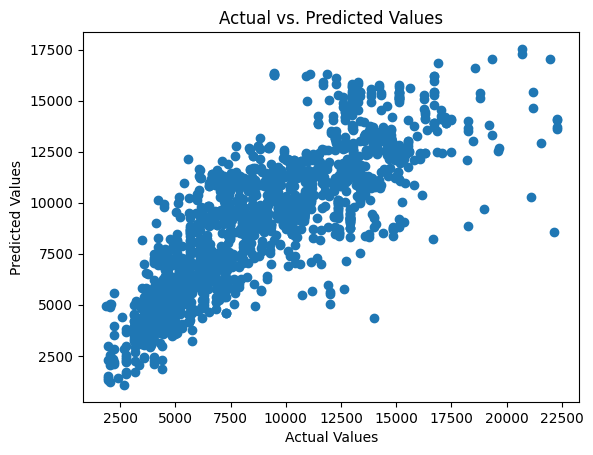

In [ ]:
# Plot actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values",)
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()
